<a href="https://colab.research.google.com/github/Vahini14/AIML-Experiments/blob/main/AIML_8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LAB EXPERIMENT-8 A)**

Develop the prediction system using Linear Regression

✅ Task 0
Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

✅ Task 1
Load the dataset and view initial details

In [ ]:
df_data = pd.read_csv('/content/Housing_Data_original.csv')
df_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


✅ Task 2
Plot pairplot for selected features

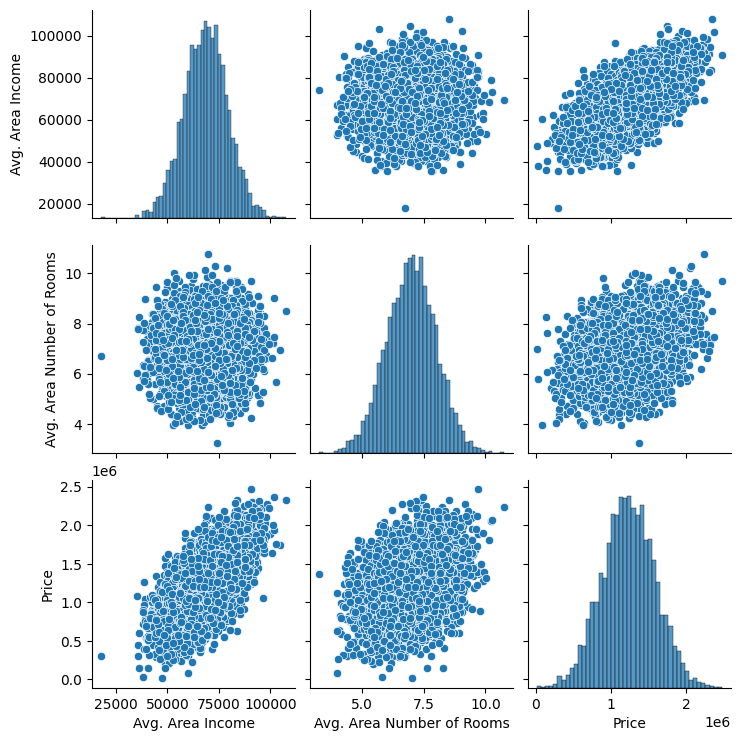

In [ ]:
selected_columns = ['Avg. Area Income', 'Avg. Area Number of Rooms', 'Price']
sns.pairplot(df_data[selected_columns])

✅ Task 3
Display all column names in the dataset

In [ ]:
print(df_data.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


✅ Task 4
Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
# Define your features and target first
X = df_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
             'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]
y = df_data['Avg. Area Number of Rooms']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

✅ Task 5
Display model coefficients and intercept

In [ ]:
# Importing Linear Regression model
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model = LinearRegression()
# Train the model using capital X_train and y_train
model.fit(X_train, y_train)
# Display the coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-1.14386150e-16 -1.64937179e-13  1.00000000e+00 -6.78460481e-15
 -2.27176689e-16  5.13710428e-18]
Model Intercept: 1.1691092538512748e-11


✅ Task 6
Display model coefficients in a structured format

In [ ]:
# Create a DataFrame to display model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeff'])
coefficients

,Coeff
Avg. Area Income,-1.143861e-16
Avg. Area House Age,-1.649372e-13
Avg. Area Number of Rooms,1.000000e+00
Avg. Area Number of Bedrooms,-6.784605e-15
Area Population,-2.271767e-16
Price,5.137104e-18


✅ Task 7
Make predictions and visualize actual vs predicted

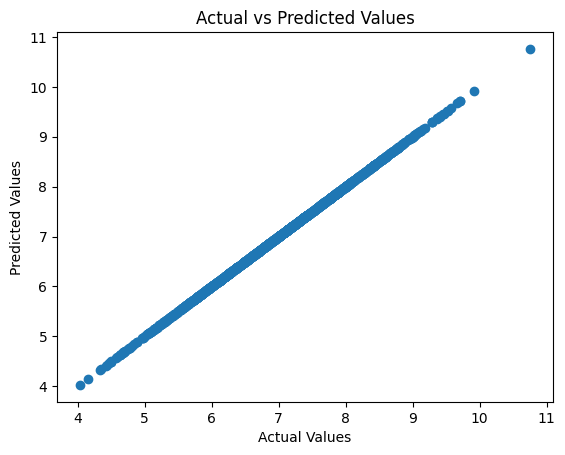

In [ ]:
# Making predictions on the test set
predictions = model.predict(X_test)
# Scatter plot between actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

✅ Task 8
Plot residual histogram

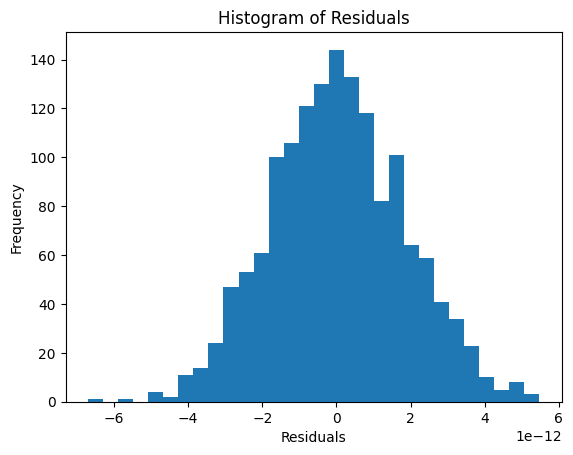

In [ ]:
# Calculate residuals (differences between actual and predicted values)
residuals = y_test - predictions
# Plot histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

✅ Task 9
Evaluate model performance

In [ ]:
# Importing metrics for evaluation
from sklearn import metrics
# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, predictions)
print('Mean Absolute Error (MAE):', mae)
# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Squared Error (MSE):', mse)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 1.4377246060348624e-12
Mean Squared Error (MSE): 3.264001365403889e-24
Root Mean Squared Error (RMSE): 1.8066547443836326e-12


**LAB EXPERIMENT-8 B)**

Develop the prediction system using Logistic Regression



✅ Task 1
Import required Python libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

✅ Task 2
Load the dataset

In [ ]:
titanic_data = pd.read_csv('/content/Titanic-Dataset_log-reg.csv')

✅ Task 3
Display column names

In [ ]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


✅ Task 4 Check for Missing Data

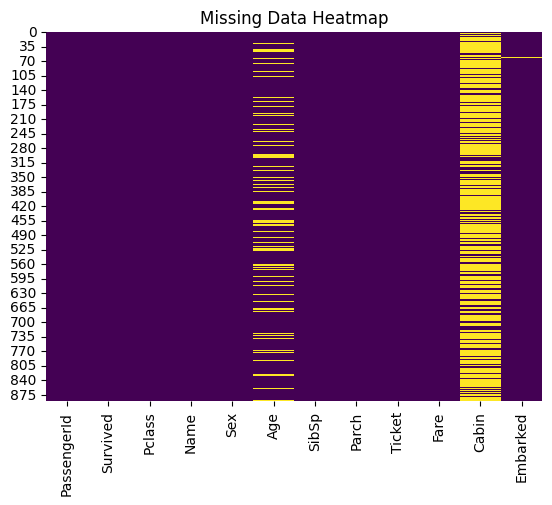

In [ ]:
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

✅ Task 5 Boxplot: Age Distribution by Passenger Class

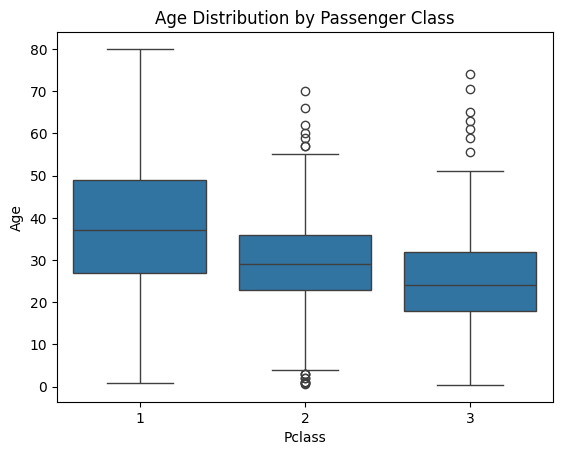

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)
plt.title("Age Distribution by Passenger Class")
plt.show()

✅ Task 6 Impute Missing Age Using Pclass

In [ ]:
def impute_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif row['Pclass'] == 2:
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        else:
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
    else:
        return row['Age']
titanic_data['Age'] = titanic_data.apply(impute_age, axis=1)

✅ Task 7 Data Cleaning and Encoding Categorical Variables

In [ ]:
titanic_data.drop(columns=['Cabin'], inplace=True, errors='ignore')
titanic_data.dropna(inplace=True)
# Convert 'Sex' and 'Embarked' to dummy variables
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first=True)
embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
titanic_data.drop(columns=['Name', 'Ticket', 'Sex', 'Embarked'], inplace=True)
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis=1)

✅ Task 8 Split Features and Target Variable

In [ ]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

✅ Task 9 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

✅ Task 10 Feature Scaling (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

✅ Task 11 Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

✅ Task 12 Make Predictions on Test Data

In [ ]:
predictions = model.predict(X_test)

✅ Task 13 Evaluate Model Performance

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[137  30]
 [ 25  75]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       167
           1       0.71      0.75      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



✅ Task 14 Predict with Custom Threshold (e.g., 0.7)

In [ ]:
y_proba = model.predict_proba(X_test)
threshold = 0.7
y_custom = (y_proba[:, 1] >= threshold).astype(int)
print("Predictions with threshold 0.7:\n", y_custom)

Predictions with threshold 0.7:
 [0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0]


✅ Task 15 Visualization — Confusion Matrix

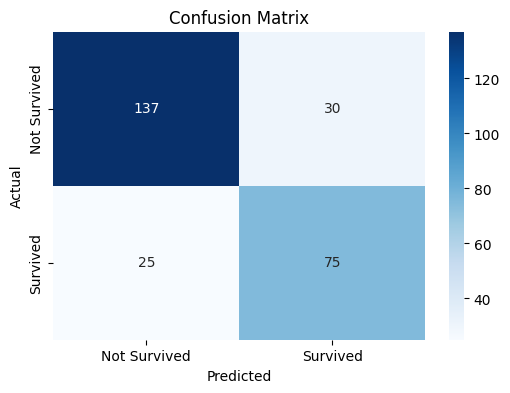

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

✅ Task 16 Visualization — ROC Curve

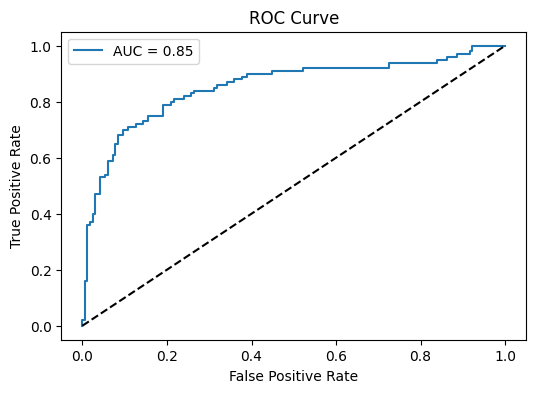

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
auc_score = roc_auc_score(y_test, y_proba[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

✅ Task 17 Visualization — Feature Importance

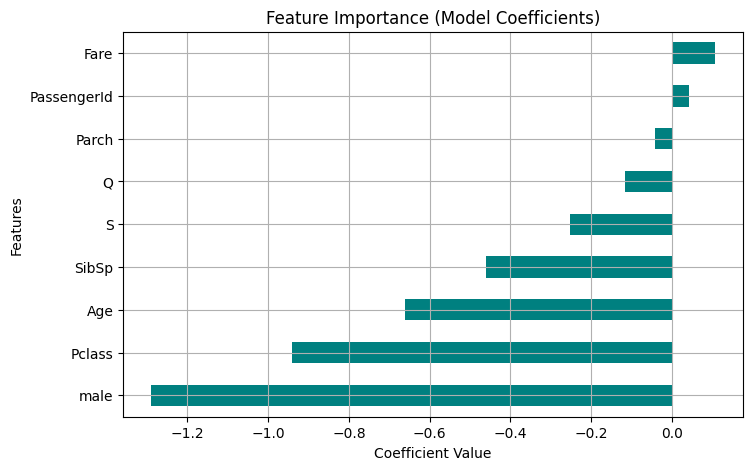

In [ ]:
import pandas as pd
coefficients = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(8, 5))
coefficients.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance (Model Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(True)
plt.show()